# Python Labs
## Support Vector Regressor 

Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model developed in the 1990s and is capable of performing linear or nonlinear classification, regression, and even outlier detection. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

## 1 Maximimal Margin Classifier

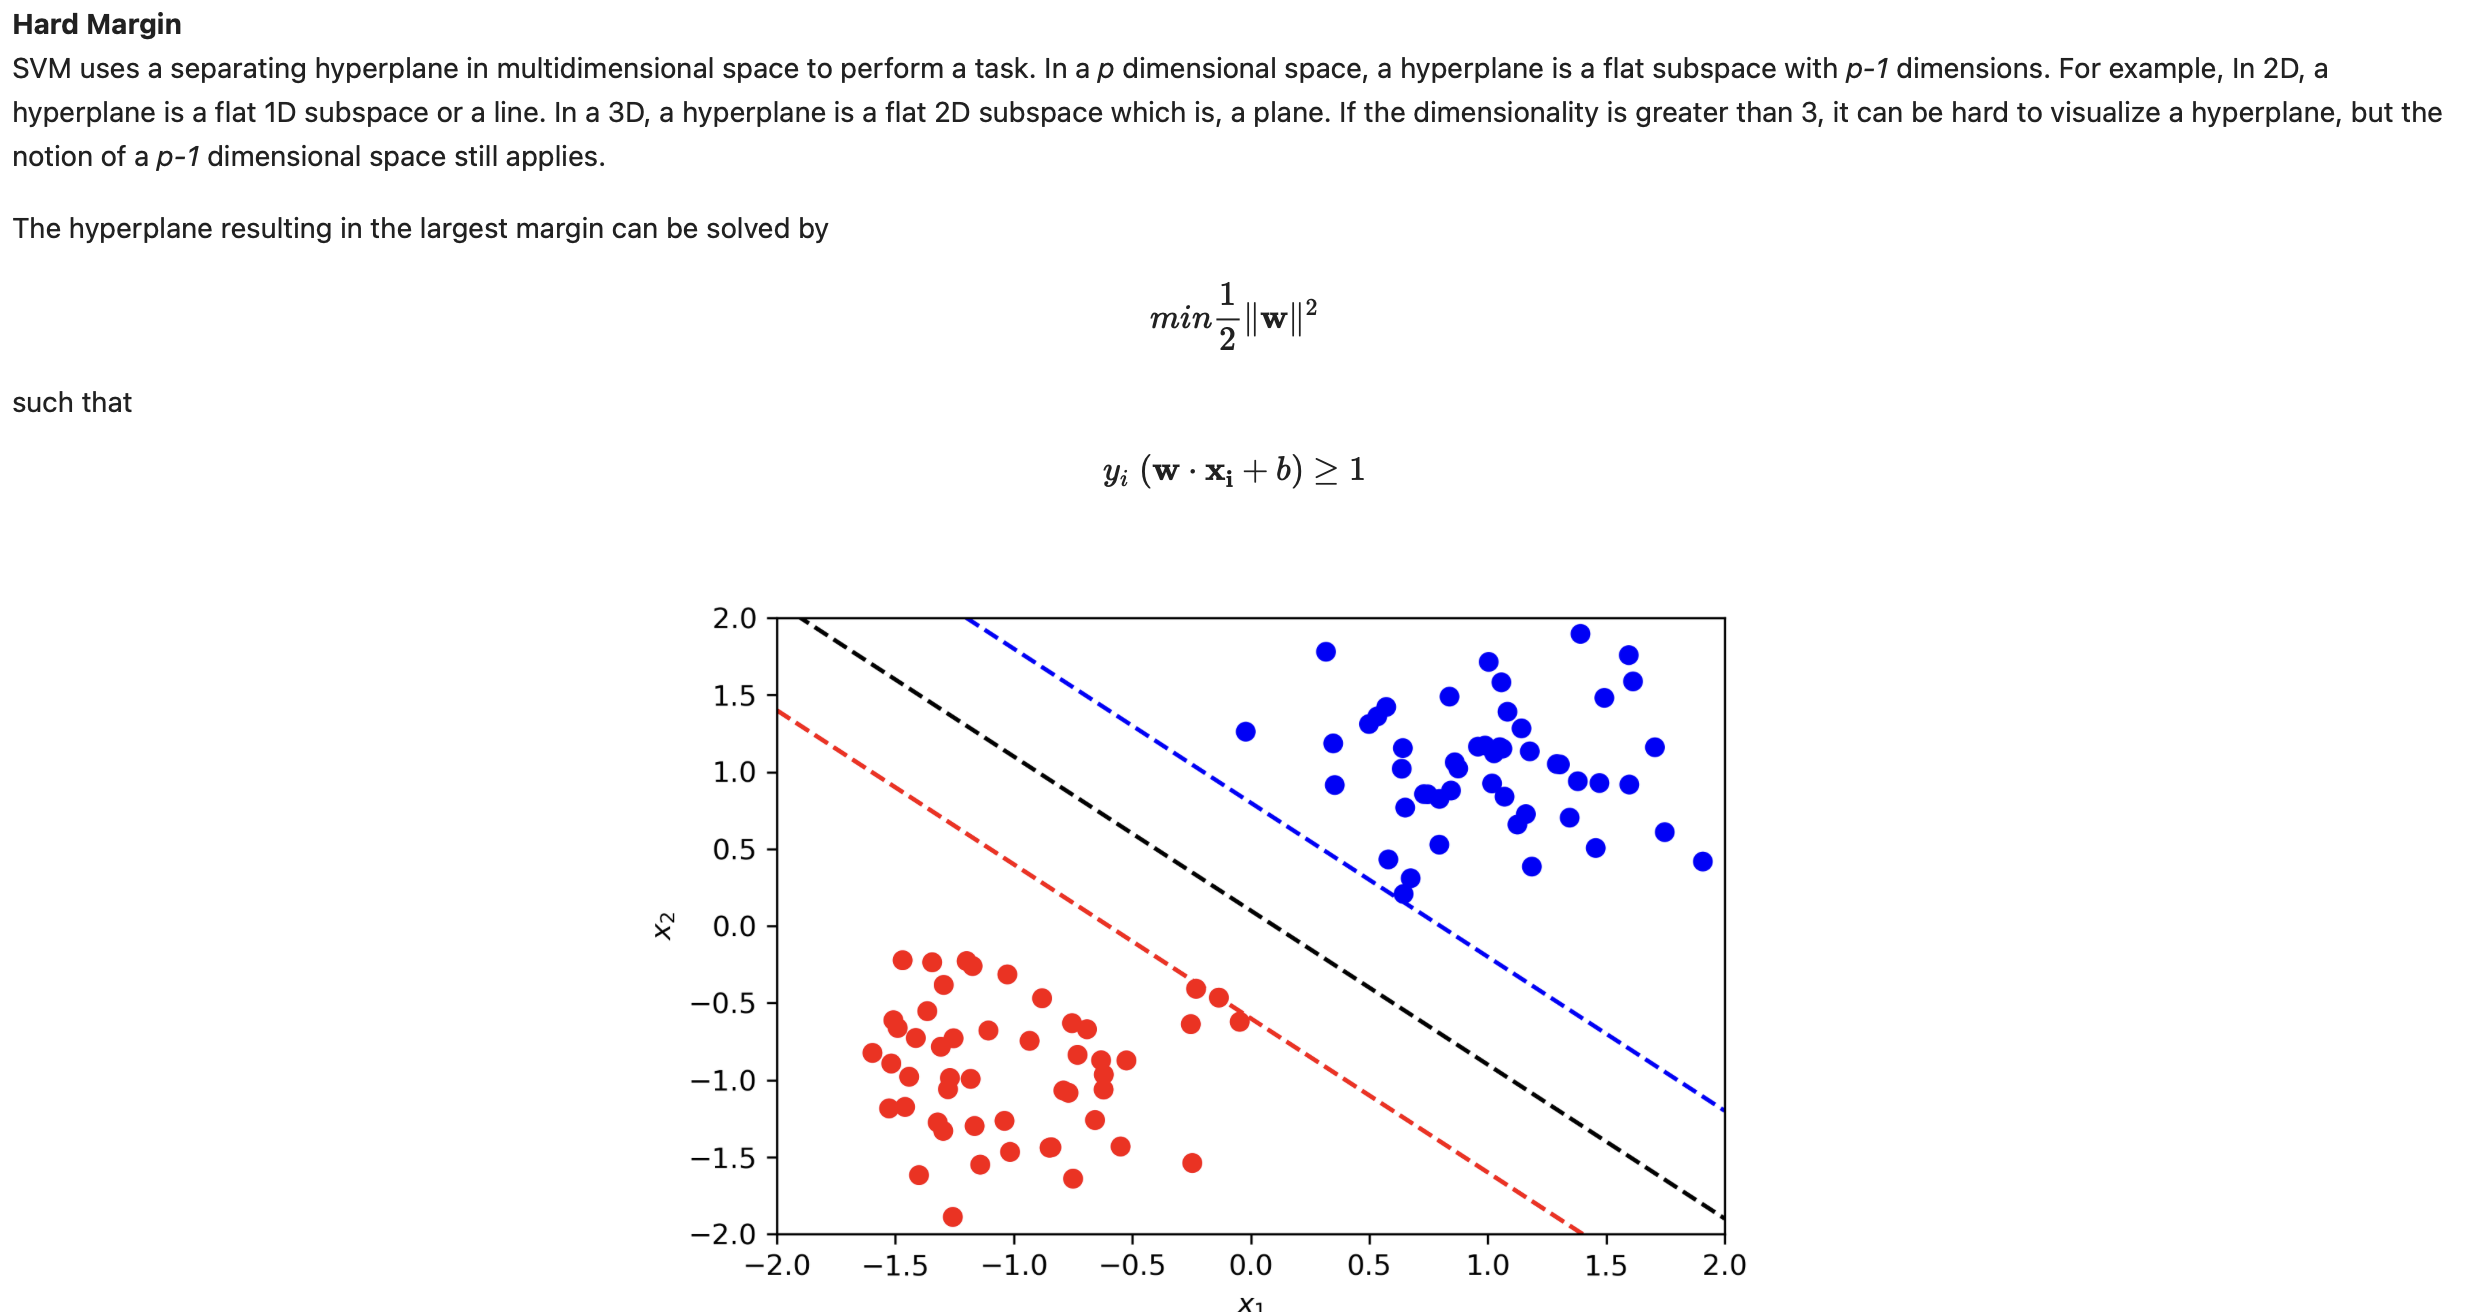



## 2 Support Vector Classifier

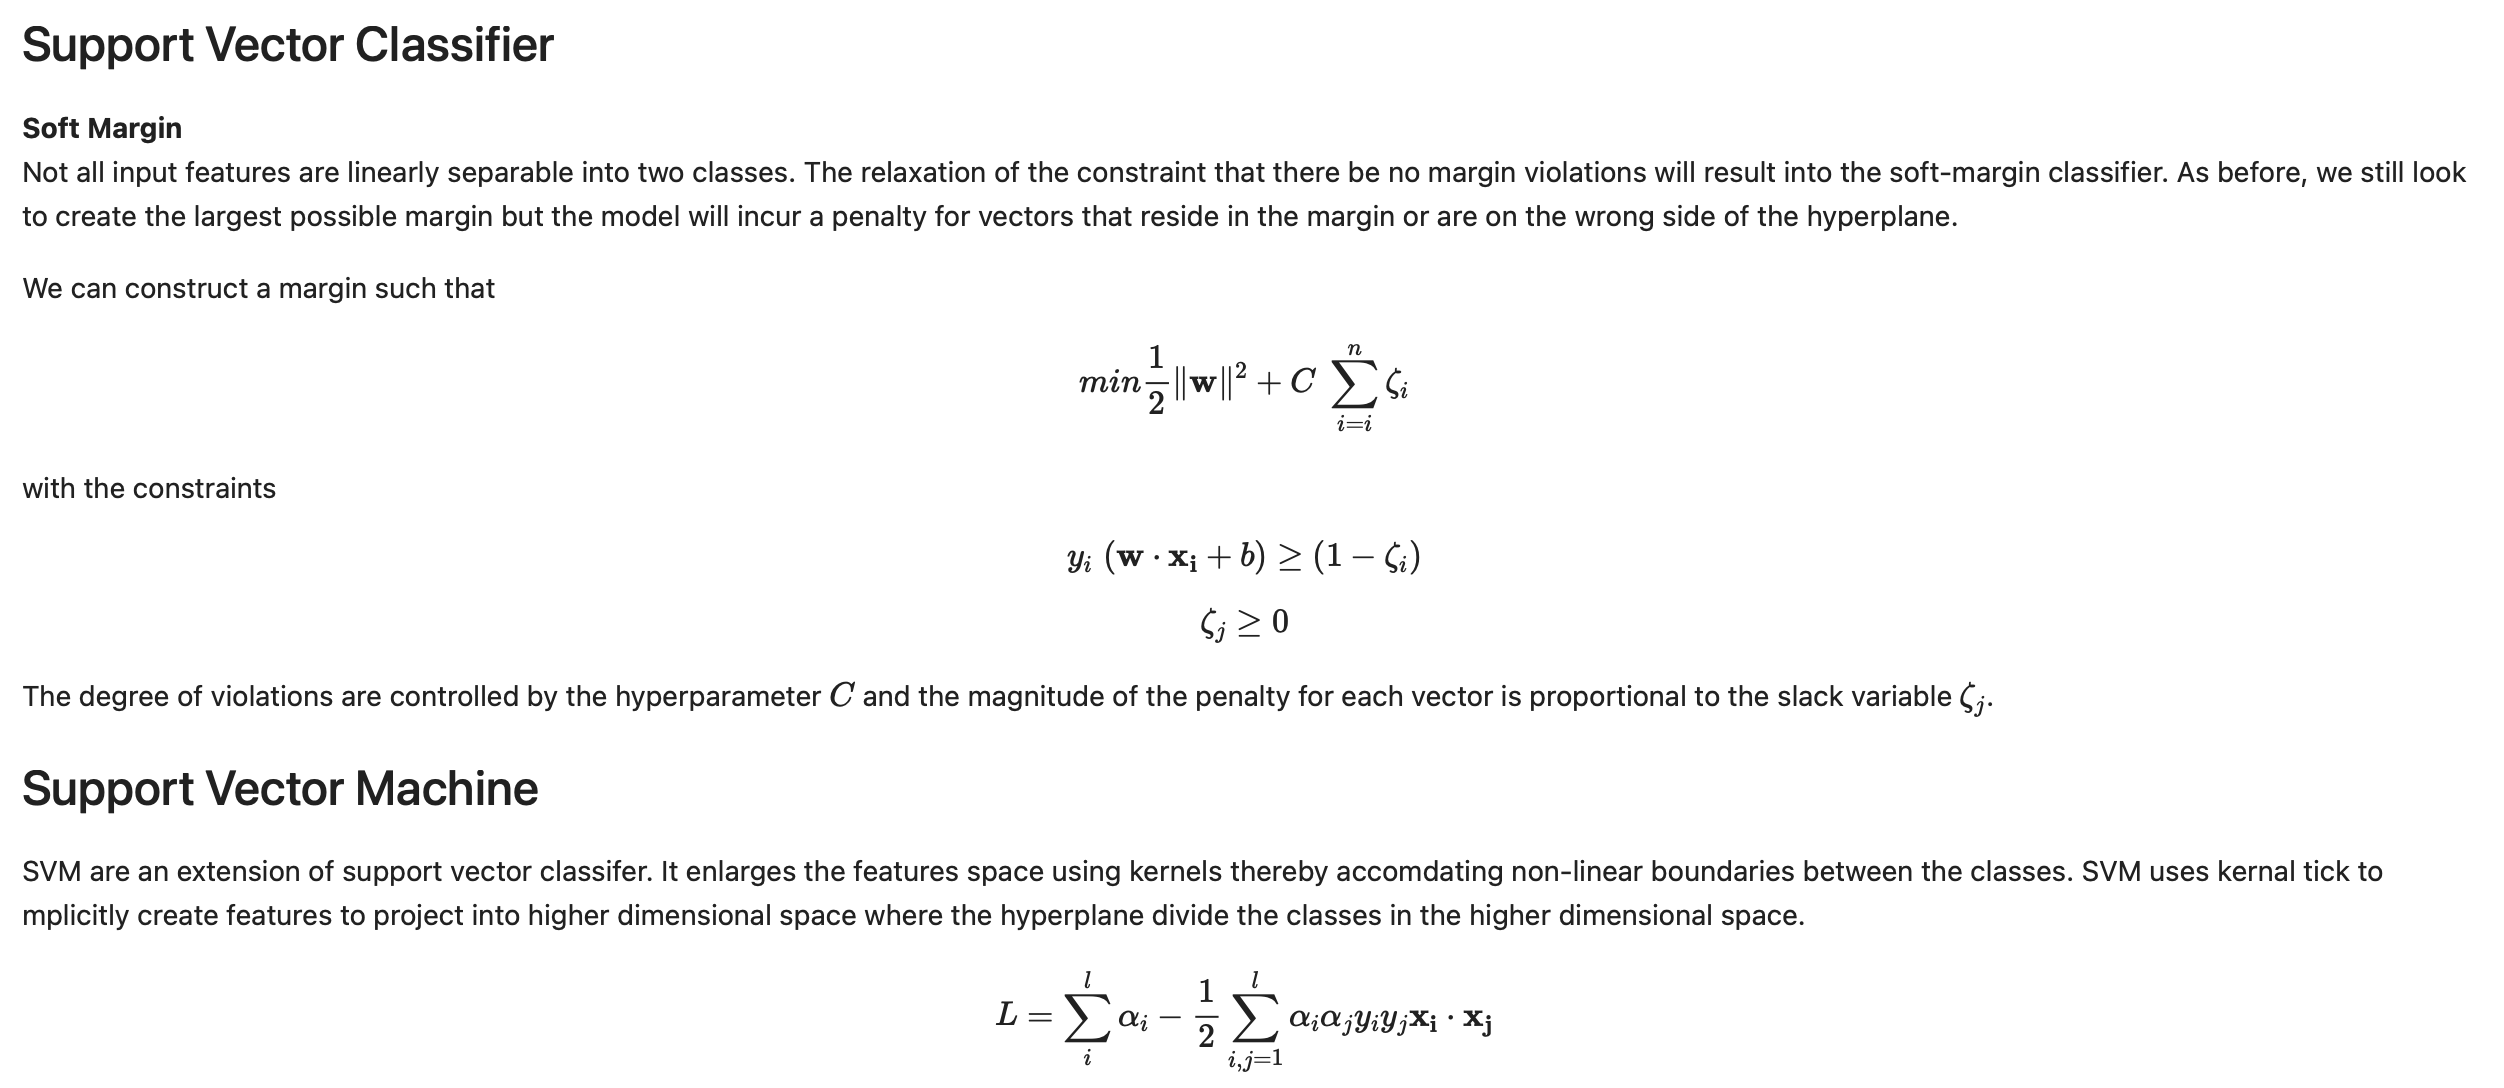


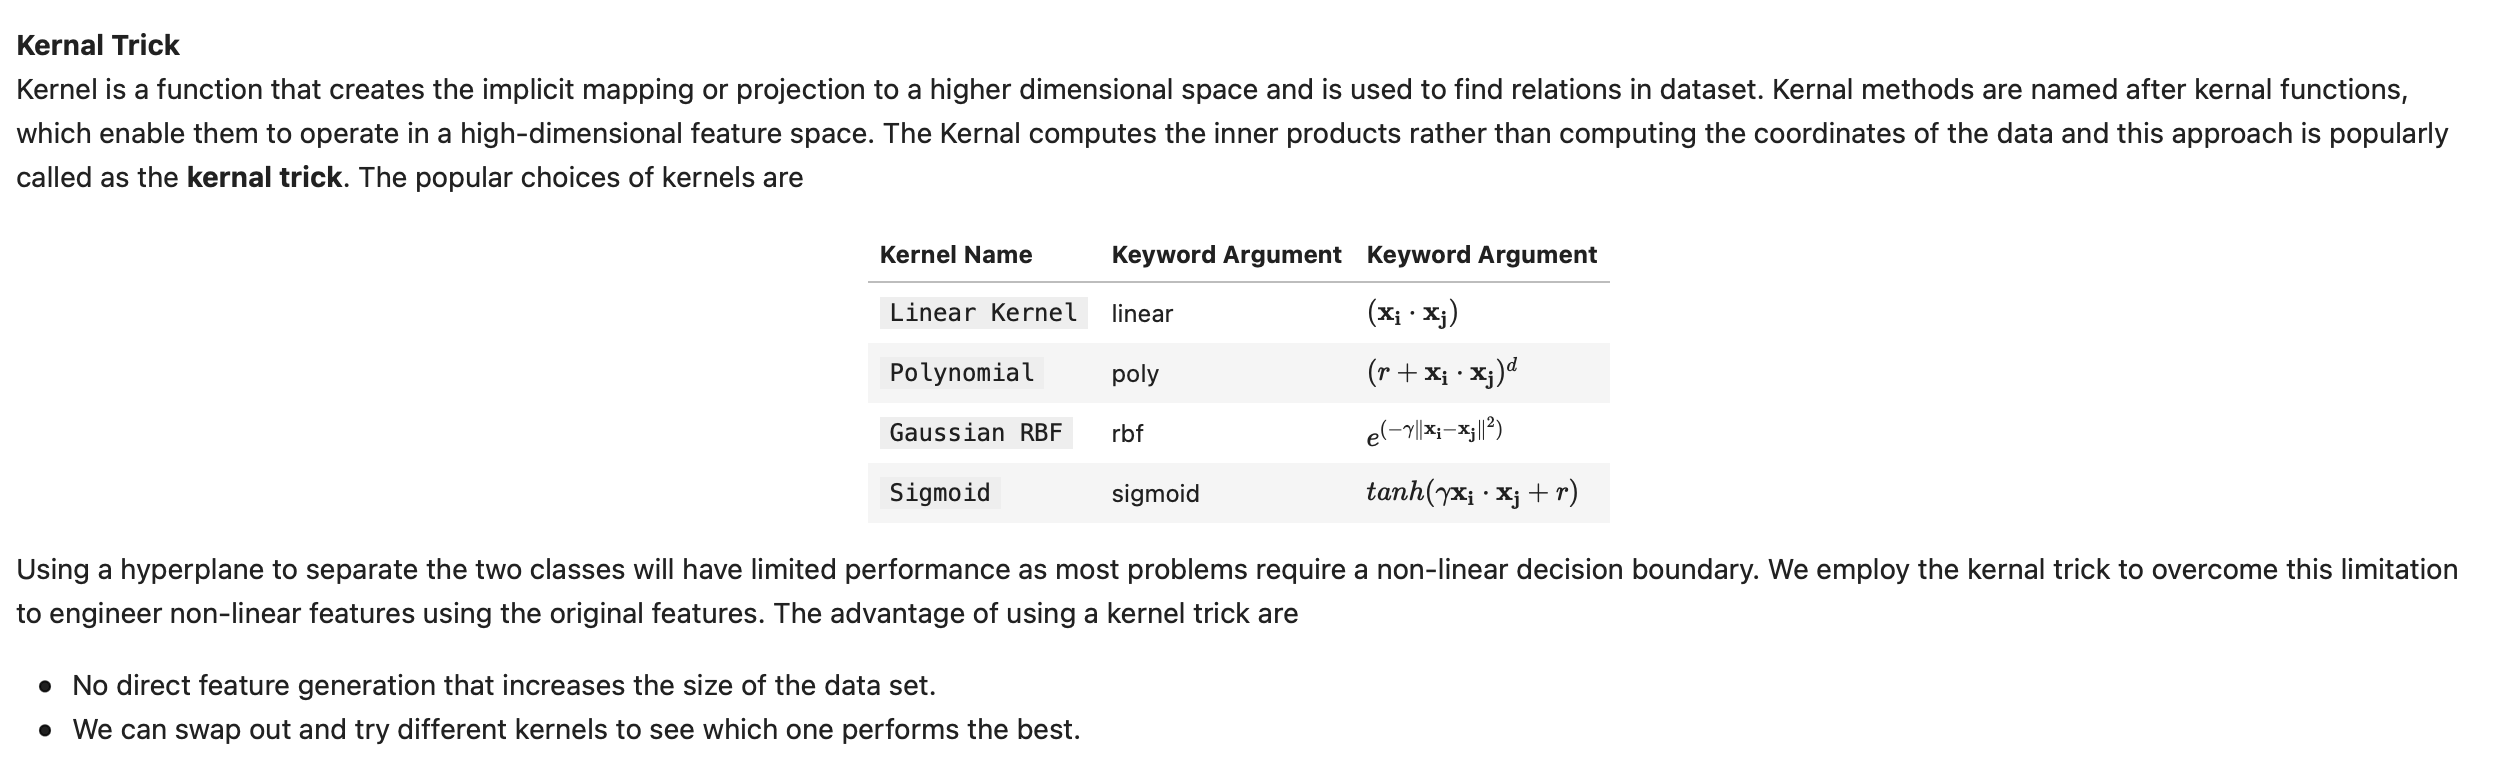

# SVM Implementation

In [2]:
# Import Libraries

# Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

# SVM
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Retrive Data

In [3]:
# Create a variable to predict for 'n' days
n = 5

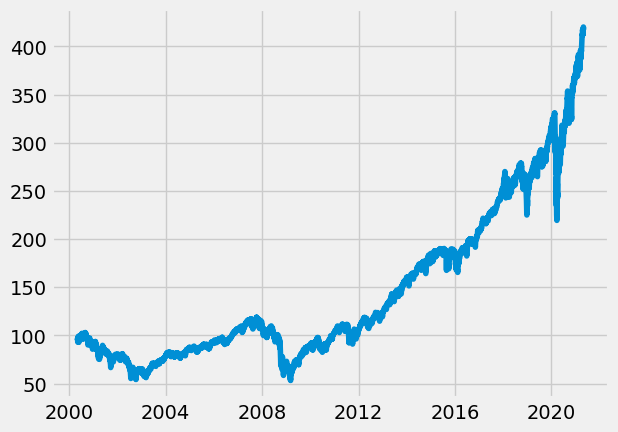

In [4]:
# Load locally stored data
df = pd.read_csv('spy.csv', index_col=0, parse_dates=True)
df = df[['Adj Close']]

# Check first 5 values 
plt.plot(df)

In [5]:
df['Target'] = df['Adj Close'].shift(-n)
df.tail(6)

,Adj Close,Target
Date,,
2021-04-23,416.739990,417.299988
2021-04-26,417.609985,NaN
2021-04-27,417.519989,NaN
2021-04-28,417.399994,NaN
2021-04-29,420.059998,NaN
2021-04-30,417.299988,NaN


## Feature Specification

Features or Predictors are also known as an independent variable which are used to determine the value of the target variable. We will use just the close price as our feature.

In [6]:
# Predictors
X = df[['Adj Close']].values[:-n]
X

array([[ 94.913345],
       [ 95.629852],
       [ 96.788887],
       ...,
       [416.070007],
       [412.269989],
       [416.73999 ]])

In [7]:
X.shape # Predictors should be of 2D

(5277, 1)

## Define Label

Label or the target variable is also known as the dependent variable. Here, the target variable is n-days lagged SPY price.

In [8]:
y = df['Target'].values[:-n]

# Check the output
y

array([ 93.143219,  95.271568,  96.304176, ..., 417.399994, 420.059998,
       417.299988])

In [9]:
y.shape  # Target Label should be 1D

(5277,)

## Split Data

In [10]:
# Splitting the datasets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size: {len(X_train)}, {len(X_test)}")

Train and Test Size: 4749, 528


## Fit Model
We will now create and train the SVM (Regessor). All the feature and label should have a similar scale and the scaling can be accomplished by using the MinMaxScaler transformer.

In [11]:
# Scale and fit the model using pipeline
# pipe = Pipeline([("scaler", MinMaxScaler()), ("regressor", SVR(C=1, gamma='auto', kernel='linear'))]) 

pipe = Pipeline([("scaler", MinMaxScaler()), ("regressor", SVR(kernel='rbf', C=1e3, gamma=0.1))]) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', SVR(C=1000.0, gamma=0.1))])

## Predict Model

In [12]:
# Predicting the test dataset
y_pred = pipe.predict(X_test)
y_pred[-5:]

array([396.008832  , 393.72146544, 396.652729  , 393.79696999,
       397.15336433])

In [13]:
# Metrics 
pipe.score(X_test,y_test) # r2_score(y_test,y_pred)

0.923154148366952

In [14]:
# Output prediction scoare
print(f'Train Accuracy: {pipe.score(X_train,y_train):0.4}')
print(f'Test Accuracy: {pipe.score(X_test,y_test):0.4}')

Train Accuracy: 0.9977
Test Accuracy: 0.9232


## Hyperparameter Tuning

Now, let's perform hyperparameter tuning using Gridsearch

In [15]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [16]:
# Get parameters list
pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('regressor', SVR(C=1000.0, gamma=0.1))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'regressor': SVR(C=1000.0, gamma=0.1),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'regressor__C': 1000.0,
 'regressor__cache_size': 200,
 'regressor__coef0': 0.0,
 'regressor__degree': 3,
 'regressor__epsilon': 0.1,
 'regressor__gamma': 0.1,
 'regressor__kernel': 'rbf',
 'regressor__max_iter': -1,
 'regressor__shrinking': True,
 'regressor__tol': 0.001,
 'regressor__verbose': False}

In [17]:
# Perform Gridsearch and fit
param_grid = {"regressor__C": [0.1, 1, 10, 100, 1000],
             "regressor__kernel": ["poly", "rbf", "sigmoid"],
              "regressor__gamma": [1e-7, 1e-4, 1e-3, 1e-2]}

gs = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor',
                                        SVR(C=1000.0, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'regressor__C': [0.1, 1, 10, 100, 1000],
                         'regressor__gamma': [1e-07, 0.0001, 0.001, 0.01],
                         'regressor__kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [18]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', SVR(C=1000, gamma=0.01, kernel='sigmoid'))])

In [19]:
# Best Params
params = gs.best_params_
params

{'regressor__C': 1000,
 'regressor__gamma': 0.01,
 'regressor__kernel': 'sigmoid'}

In [20]:
# Best Score
# Mean cross-validated score of the best_estimator
gs.best_score_

0.9706464355302431

In [21]:
# Cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(gs, X_train, y_train, cv=tscv)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


array([0.96838108, 0.97520459, 0.95201466, 0.97454818, 0.98065039])

In [22]:
# Predicting the test dataset
y_preds = gs.predict(X_test)
y_preds[-5:]

array([416.47595223, 413.4268918 , 417.33853633, 413.52716661,
       418.01051957])

In [23]:
# Output prediction scoare
print(f'Train Accuracy\t: {gs.score(X_train,y_train):0.6}')
print(f'Test Accuracy\t: {gs.score(X_test,y_test):0.6}')

Train Accuracy	: 0.997653
Test Accuracy	: 0.953792


## Visualize

Let's now visualize the real, predicted values and the spread between them.

In [24]:
# Create a dataframe to subsume key values
df3 = pd.DataFrame({'X': X_test.flatten(), 'y': y_preds})
df3['X'] = df3['X'].shift(-n)
df3['X-y'] = df3['X'] - df3['y']
df3 = df3[:-n]

df3.tail(n)

,X,y,X-y
518,415.209991,412.895310,2.314681
519,412.170013,414.118926,-1.948913
520,416.070007,412.704739,3.365268
521,412.269989,417.137927,-4.867938
522,416.739990,418.532092,-1.792102


In [25]:
# Check for missing values
df3.isnull().sum()

X      0
y      0
X-y    0
dtype: int64

In [26]:
# Mean difference
print(f'Mean Difference\t: {np.mean(df3["X-y"]):0.4}')

Mean Difference	: 0.4091


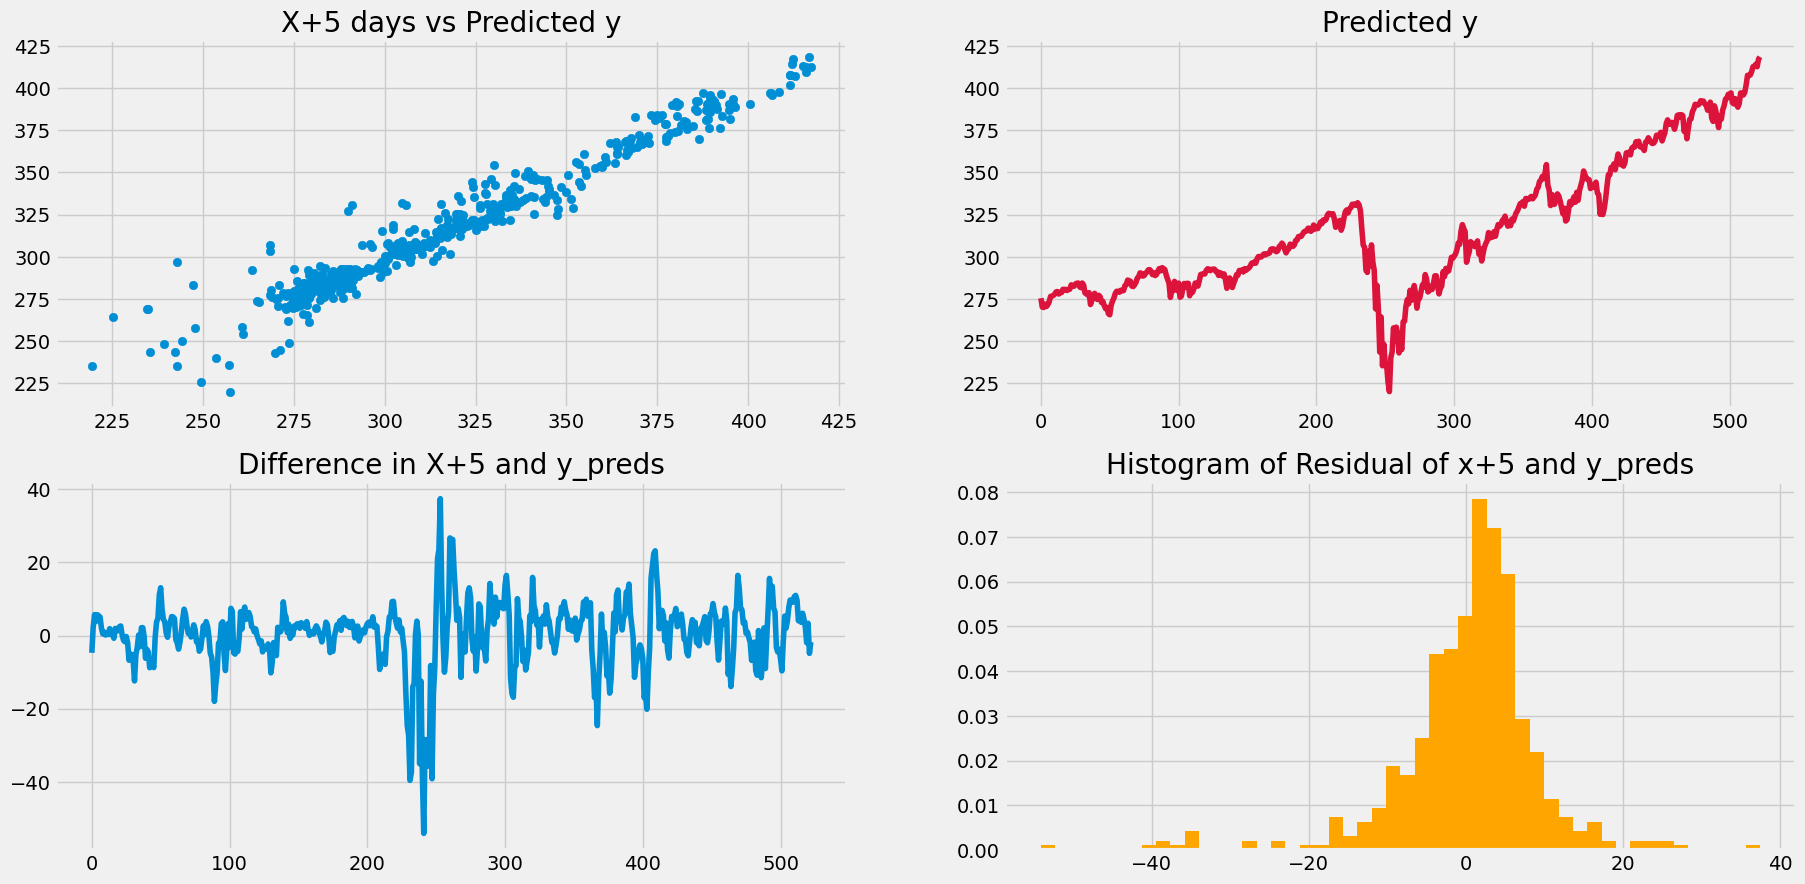

In [27]:
# Plot x+5 vs y_pred
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0,0].scatter(df3['X'], df3['y'])
ax[0,0].set_title('X+5 days vs Predicted y')

# # Plot Predicted Price
ax[0,1].plot(df3.index, y_preds[:-n], 'crimson')
ax[0,1].set_title('Predicted y')

# # Plot Residual of x+5 and y_pred 
ax[1,0].plot(df3.index, df3['X-y'])
ax[1,0].set_title('Difference in X+5 and y_preds')

# # Plot Histogram of Residual of x+5 and y_pred 
ax[1,1].hist(df3['X-y'], bins=50, density=True, color='orange')
ax[1,1].set_title('Histogram of Residual of x+5 and y_preds');